In [3]:
from sklearn.datasets.base import get_data_home
print(get_data_home())

C:\Users\90512\scikit_learn_data


In [4]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')


C:\software_program\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\software_program\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
X ,y = mnist["data"], mnist["target"]

In [6]:
X.shape
y.shape

(70000,)

In [7]:
X[36000]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [8]:
import matplotlib.pyplot as plt
import matplotlib


some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image
           #, cmap = matplotlib.cm.binary
           , cmap = 'jet'
         #  , interpolation = "nearest" 
          )
plt.axis("off")
plt.show()

<Figure size 640x480 with 1 Axes>

In [9]:
import numpy as np

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [10]:
y_train_5 = (y_train == 5)

In [11]:
sum(y_train_5 == True)

5421

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf = sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])



array([ True])

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")


array([0.9633 , 0.9509 , 0.95515])

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)


In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53385,  1194],
       [ 1419,  4002]], dtype=int64)

In [16]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7538852783272111

In [17]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([5192.59776416])

In [18]:
threshold = 2000
y_some_digit_pred = (y_scores >threshold)
y_some_digit_pred

array([ True])

In [19]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv =3 , method = 'decision_function')

In [20]:
from sklearn.metrics import precision_recall_curve


precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

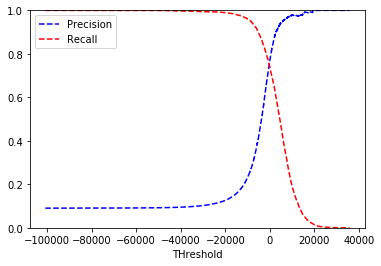

In [21]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure()
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "r--", label = "Recall")
    plt.xlabel("THreshold")
    plt.legend(loc = "upper left")
    plt.ylim([0,1])
    plt.show()
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


In [22]:
print(len(precisions[:]))
len(recalls[:])
print(thresholds)

59971
[-100795.97968252 -100652.47258943 -100032.6016584  ...   30156.43619518
   30550.59018205   35814.49829978]


In [23]:
from sklearn.metrics import precision_score, recall_score 

y_train_pred_90 = (y_scores > 25000)

precision_score(y_train_5, y_train_pred_90)

1.0

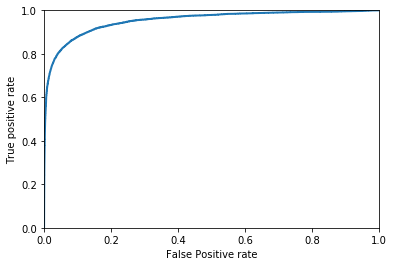

In [24]:
from sklearn.metrics import roc_curve

fpr,tpr, threshold = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, threshold):
    plt.plot(fpr, tpr, linewidth = 2, label = "ROC")
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive rate')
    plt.ylabel('True positive rate')
    
    
plot_roc_curve(fpr,tpr, threshold)

In [25]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9532623380174043

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv =3, method = "predict_proba")

C:\software_program\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\software_program\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\software_program\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
y_scores_forest = y_probas_forest[:, 1] # 取预测为第一类的样例的概率
fpr_forest, tpr_forest, threshols_forest = roc_curve(y_train_5, y_scores_forest)

In [28]:
plt

<module 'matplotlib.pyplot' from 'C:\\software_program\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

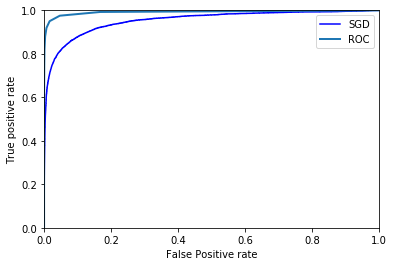

In [29]:
plt.plot(fpr, tpr, "b-", label = "SGD")
plot_roc_curve(fpr_forest,tpr_forest, threshols_forest)
plt.legend()
plt.show()

In [30]:
sgd_clf.fit(X_train, y_train)

sgd_clf.predict([some_digit])

array([5.])

In [31]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -3301.19732731, -21318.96468323, -22568.99202432,
         -1209.39373864, -10404.49324673,   4765.47697772,
        -22826.90922574, -13097.46922521,  -7377.41454368,
        -13280.37598736]])

In [32]:
np.argmax(some_digit_scores)

5

In [34]:
sgd_clf.classes_[5]

5.0

In [35]:
from sklearn.multiclass import OneVsOneClassifier


ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5.])

In [37]:
len(ovo_clf.estimators_) # 45个分类器

45

In [38]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

C:\software_program\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5.])

In [39]:
forest_clf.predict_proba([some_digit])

array([[0.3, 0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0.1, 0. ]])

In [41]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.86882623, 0.8760438 , 0.8706806 ])

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")


array([0.89562088, 0.90049502, 0.90183528])

In [48]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5584,    0,   21,    7,    9,   32,   34,    6,  229,    1],
       [   0, 6421,   41,   22,    3,   38,    6,    9,  194,    8],
       [  27,   26, 5245,   83,   75,   25,   74,   41,  354,    8],
       [  26,   19,  113, 5234,    2,  191,   29,   43,  406,   68],
       [  11,   18,   42,    9, 5224,   11,   37,   18,  323,  149],
       [  29,   21,   29,  160,   56, 4431,   79,   16,  535,   65],
       [  28,   20,   38,    3,   41,   83, 5547,    8,  150,    0],
       [  21,   13,   52,   24,   46,   11,    3, 5705,  195,  195],
       [  15,   63,   35,   94,    1,  122,   27,    7, 5443,   44],
       [  22,   21,   28,   59,  123,   41,    1,  169,  360, 5125]],
      dtype=int64)

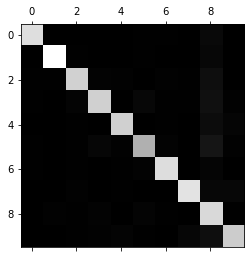

In [49]:
plt.matshow(conf_mx, cmap = 'gray') # 数字越大，颜色越亮
plt.show()

In [50]:
conf_mx_copy = conf_mx.copy() 

In [56]:
conf_mx_copy

array([[5584,    0, 7777,    7,    9,   32,   34,    6,  229,    1],
       [   0, 6421,   41,   22,    3,   38,    6,    9,  194,    8],
       [  27,   26, 5245,   83,   75,   25,   74,   41,  354,    8],
       [  26,   19,  113, 5234,    2,  191,   29,   43,  406,   68],
       [  11,   18,   42,    9, 5224,   11,   37,   18,  323,  149],
       [  29,   21,   29,  160,   56, 4431,   79,   16,  535,   65],
       [  28,   20,   38,    3,   41,   83, 5547,    8,  150,    0],
       [  21,   13,   52,   24,   46,   11,    3, 5705,  195,  195],
       [  15,   63,   35,   94,    1,  122,   27,    7, 5443,   44],
       [  22,   21,   28,   59,  123,   41,    1,  169,  360, 5125]],
      dtype=int64)

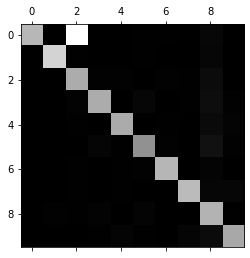

In [57]:
plt.matshow(conf_mx_copy, cmap = 'gray')

In [61]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

In [62]:
norm_conf_mx

array([[9.42765490e-01, 0.00000000e+00, 3.54550059e-03, 1.18183353e-03,
        1.51950025e-03, 5.40266757e-03, 5.74033429e-03, 1.01300017e-03,
        3.86628398e-02, 1.68833361e-04],
       [0.00000000e+00, 9.52388015e-01, 6.08128152e-03, 3.26312667e-03,
        4.44971818e-04, 5.63630970e-03, 8.89943637e-04, 1.33491546e-03,
        2.87748443e-02, 1.18659152e-03],
       [4.53172205e-03, 4.36388050e-03, 8.80328969e-01, 1.39308493e-02,
        1.25881168e-02, 4.19603894e-03, 1.24202753e-02, 6.88150386e-03,
        5.94159114e-02, 1.34273246e-03],
       [4.24074376e-03, 3.09900506e-03, 1.84309248e-02, 8.53694340e-01,
        3.26211059e-04, 3.11531561e-02, 4.73006035e-03, 7.01353776e-03,
        6.62208449e-02, 1.10911760e-02],
       [1.88291681e-03, 3.08113660e-03, 7.18931873e-03, 1.54056830e-03,
        8.94214310e-01, 1.88291681e-03, 6.33344745e-03, 3.08113660e-03,
        5.52892845e-02, 2.55049641e-02],
       [5.34956650e-03, 3.87382402e-03, 5.34956650e-03, 2.95148497e-02,
   

In [63]:
conf_mx

array([[5584,    0,   21,    7,    9,   32,   34,    6,  229,    1],
       [   0, 6421,   41,   22,    3,   38,    6,    9,  194,    8],
       [  27,   26, 5245,   83,   75,   25,   74,   41,  354,    8],
       [  26,   19,  113, 5234,    2,  191,   29,   43,  406,   68],
       [  11,   18,   42,    9, 5224,   11,   37,   18,  323,  149],
       [  29,   21,   29,  160,   56, 4431,   79,   16,  535,   65],
       [  28,   20,   38,    3,   41,   83, 5547,    8,  150,    0],
       [  21,   13,   52,   24,   46,   11,    3, 5705,  195,  195],
       [  15,   63,   35,   94,    1,  122,   27,    7, 5443,   44],
       [  22,   21,   28,   59,  123,   41,    1,  169,  360, 5125]],
      dtype=int64)

In [64]:
np.fill_diagonal(norm_conf_mx, 0)
norm_conf_mx

array([[0.        , 0.        , 0.0035455 , 0.00118183, 0.0015195 ,
        0.00540267, 0.00574033, 0.001013  , 0.03866284, 0.00016883],
       [0.        , 0.        , 0.00608128, 0.00326313, 0.00044497,
        0.00563631, 0.00088994, 0.00133492, 0.02877484, 0.00118659],
       [0.00453172, 0.00436388, 0.        , 0.01393085, 0.01258812,
        0.00419604, 0.01242028, 0.0068815 , 0.05941591, 0.00134273],
       [0.00424074, 0.00309901, 0.01843092, 0.        , 0.00032621,
        0.03115316, 0.00473006, 0.00701354, 0.06622084, 0.01109118],
       [0.00188292, 0.00308114, 0.00718932, 0.00154057, 0.        ,
        0.00188292, 0.00633345, 0.00308114, 0.05528928, 0.02550496],
       [0.00534957, 0.00387382, 0.00534957, 0.02951485, 0.0103302 ,
        0.        , 0.01457296, 0.00295148, 0.09869028, 0.01199041],
       [0.00473133, 0.00337952, 0.00642109, 0.00050693, 0.00692802,
        0.01402501, 0.        , 0.00135181, 0.0253464 , 0.        ],
       [0.00335196, 0.00207502, 0.0083000

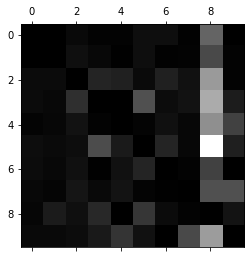

In [65]:
plt.matshow(norm_conf_mx, cmap = 'gray')

In [70]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]

In [72]:
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

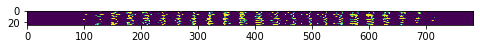

In [83]:
plt.figure(figsize = (8,8))
plt.imshow(X_ab[:25])

In [90]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

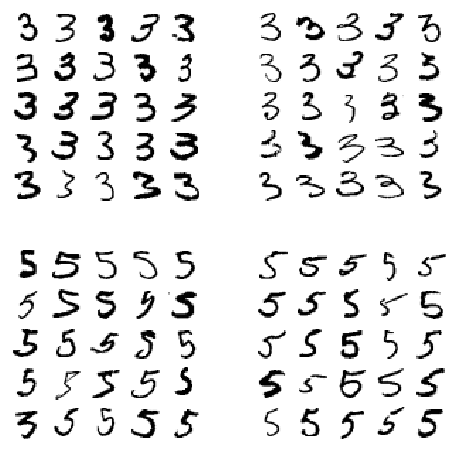

In [91]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [93]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [96]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [97]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [98]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv = 3)
f1_socre(y_train, y_train_knn_pred, average = "macro") # average假设所有的标签有着同等的重要性

KeyboardInterrupt: 

In [ ]:
noise = rnd.randint(0,100, size = (len(X_train), 784))
X_train_mod = X_train + noise
noise = rnd.randint(0,100, size = (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
some_index = 5000
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict(X_test_mod[some_index])
plot_digit(clean_digit)